Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (20).jpg


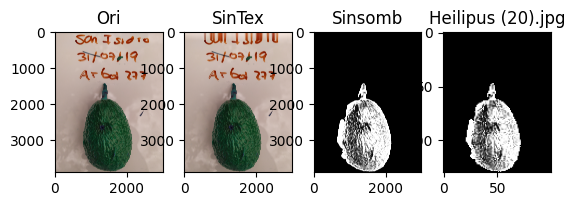

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_sano(221).jpg


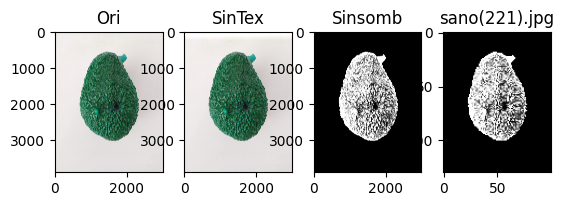

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (18).jpg


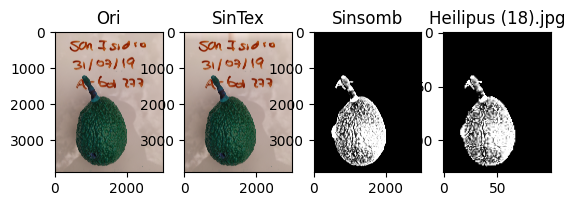

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (16).jpg


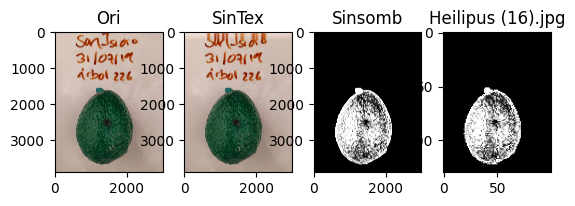

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_sano(225).jpg


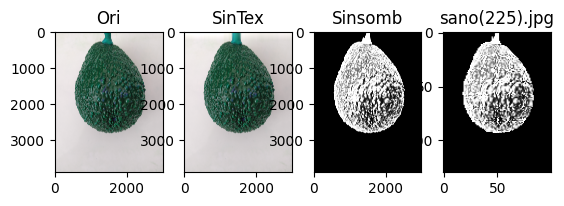

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (7).jpg


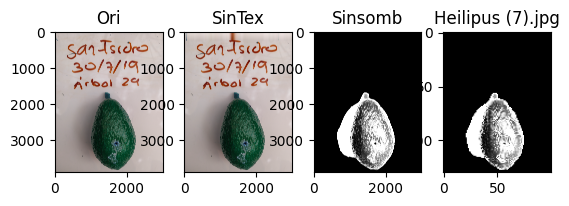

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (6).jpg


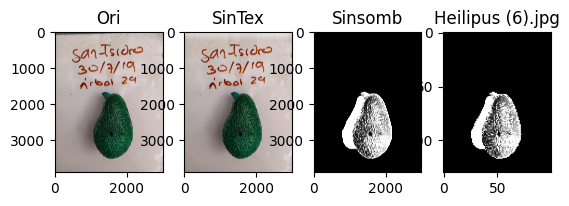

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (24).jpg


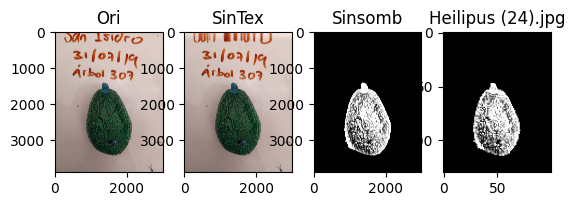

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (13).jpg


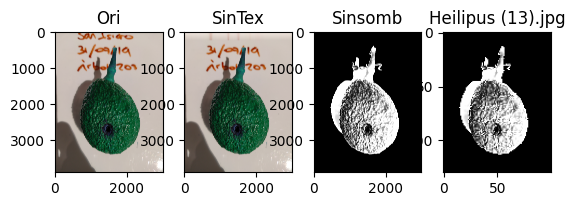

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_sano(223).jpg


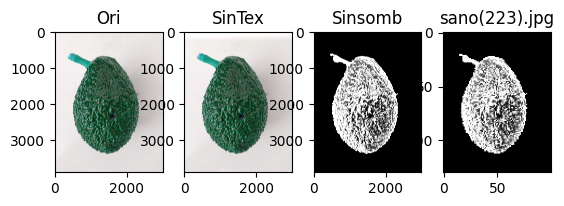

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_sano(294).jpg


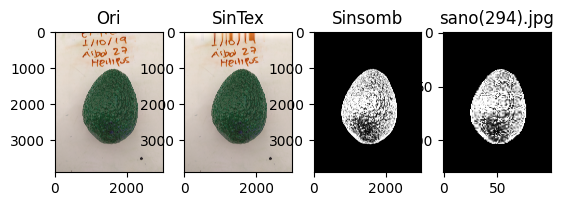

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_Heilipus (15).jpg


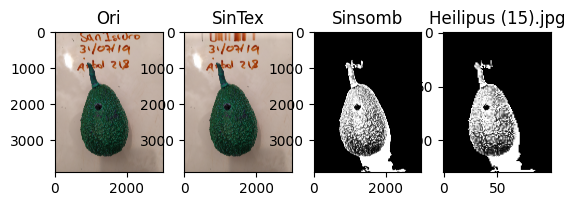

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3
/home/maucasco/Documents/maestria/proyecto_grado/filter_project/assets/process/fil_sano(290).jpg


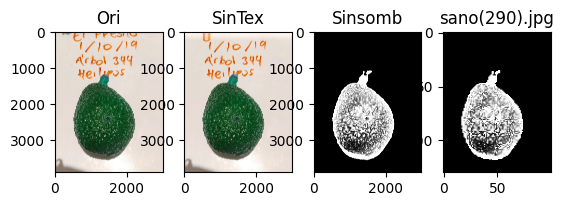

Type: <class 'numpy.ndarray'>
Shape of Image: (3900, 3000, 3)
Total Number of pixels: 35100000
Image data type: uint8
Dimension: 3


In [1]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt



def eliminar_sombras(img):
   # Aplicar thresholding para segmentar la sombra blanca
    _, binary = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)
    
    # Operaciones morfológicas para limpiar la imagen binarizada
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=4)
    
    # Usar la máscara para sustraer la sombra blanca de la imagen original
    result = cv2.bitwise_and(img, cleaned)
    print(img)
    return result


def eliminar_texto(imagen, x_inicio, y_inicio, x_fin, y_fin):
    mascara = np.zeros_like(imagen[:, :, 0])
    mascara[y_inicio:y_fin, x_inicio:x_fin] = 255
    dilatada = cv2.dilate(mascara, (1,1), iterations = 2)  # Dilatar para cubrir más región del texto
    return cv2.inpaint(imagen, dilatada, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

def mejorar_contraste(imagen):
    # Ecualización del histograma
    ecualizada = cv2.equalizeHist(imagen)
    
    # Ajuste de contraste y brillo
    contraste = 1.5  # Factor de contraste (mayor que 1 aumenta el contraste)
    brillo = 30      # Ajuste de brillo
    mejorada = cv2.convertScaleAbs(ecualizada, alpha=contraste, beta=brillo)
    
    # Filtro bilateral para suavizar el ruido manteniendo los bordes
    filtrada = cv2.bilateralFilter(mejorada, 9, 75, 75)
    
    return filtrada

def segmentar_imagen(imagen_sin_texto):
   
    
    # Eliminar sombras
    imagen_gris = cv2.cvtColor(imagen_sin_texto, cv2.COLOR_BGR2GRAY)
    
    # Usar thresholding de Otsu
    _, imagen_segmentada = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Detección de contornos y conservar solo el contorno más grande
    contours, _ = cv2.findContours(imagen_segmentada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filtrar contornos por área
    min_area = 3000  # Puedes ajustar este valor
    contours = [c for c in contours if cv2.contourArea(c) > min_area]
    
    mask = np.zeros_like(imagen_gris)
    if contours:
        # Ordenar contornos y dibujar el más grande
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        cv2.drawContours(mask, [contours[0]], -1, (255), thickness=cv2.FILLED)
    
    aguacate = cv2.bitwise_and(imagen_gris, imagen_gris, mask=mask)
    
    # Mejorar el contraste y brillo del aguacate
    aguacate_resaltado = mejorar_contraste(aguacate)
    
    return aguacate_resaltado

# Carga y preprocesamiento
def redimensionar(image):
   original_height, original_width = image.shape[:2]
   desired_width = 100

# Calcula el factor de escala y el alto deseado
   scale_factor = desired_width / original_width
   desired_height = int(original_height * scale_factor)

# Redimensiona la imagen proporcionalmente
   resized_img = cv2.resize(image, (desired_width, desired_height))


   return resized_img

def procesar_imagen(ruta_imagen,nombre):
    imagen = cv2.imread(ruta_imagen)[100:, :]

    imagen_sin_texto=[]
    print("Type:",type(imagen))
    print("Shape of Image:", imagen.shape)
    print('Total Number of pixels:', imagen.size)
    print("Image data type:",imagen.dtype)
        # print("Pixel Values:\n", img)
    print("Dimension:", imagen.ndim)


    if imagen.size>1000000:
        imagen_sin_texto = eliminar_texto(imagen, 0, 0, 3000, 250)
    elif imagen.size>10000000:
        imagen_sin_texto = eliminar_texto(imagen, 0, 0, 3000, 1000)
    else:
        imagen_sin_texto = eliminar_texto(imagen, 0, 0, 3000, 500)    
        
    aguacate_solo = segmentar_imagen(imagen_sin_texto)
    redimenciada = redimensionar(aguacate_solo)
    nuevaImga=directorio+'/process/fil_'+nombre
    print(nuevaImga)
    cv2.imwrite(nuevaImga, redimenciada)
    return imagen, imagen_sin_texto, aguacate_solo,redimenciada


def mostrar_imagenes(titulos, imagenes):
    count = len(titulos)
    for i in range(count):
        plt.subplot(1, count, i + 1)
        plt.title(titulos[i])
        plt.imshow(imagenes[i], cmap='gray')
    plt.show()

def main(directorio):
    datamodel=[]
    archivos = os.listdir(directorio)
    for archivo in archivos:
        if archivo.endswith(".jpg"):
            ruta_imagen = os.path.join(directorio, archivo)
            titulos = ["Ori", "SinTex","Sinsomb", archivo]
            imagenes = procesar_imagen(ruta_imagen,archivo)
            mostrar_imagenes(titulos, imagenes)
      

if __name__ == '__main__':
    directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"
    main(directorio)
